## Import packages 

In [1]:
## Major Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy 
import scipy.stats as stats
import pylab
## Other
import os, joblib, missingno

## sklearn -- Preprocessing & Tuning & Transformation
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn_features.transformers import DataFrameSelector

## sklearn -- metrics
from sklearn.metrics import mean_squared_error, r2_score

## sklearn -- Models
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor

## Xgboost
from xgboost import XGBRegressor

## Load data and look at the big picture

In [2]:
# load dataset

df_housing_o=pd.read_csv(r"F:\AI\1.Traditional Machine Learning\muhammad agoor\Regression_Project_Udemy-main\housing.csv")
df_housing=df_housing_o.copy()

In [3]:
# show random 5 instances of data
df_housing.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
2035,-119.74,36.73,42.0,1236.0,272.0,946.0,261.0,2.0536,50000.0,INLAND
8965,-118.39,34.00,35.0,1465.0,386.0,1104.0,345.0,4.0560,339100.0,<1H OCEAN
12881,-121.34,38.68,28.0,3379.0,552.0,1543.0,556.0,4.2743,124000.0,INLAND
3990,-118.66,34.19,23.0,7544.0,1031.0,3221.0,1043.0,7.6420,374900.0,<1H OCEAN
3750,-118.38,34.18,27.0,4834.0,1527.0,3847.0,1432.0,2.1449,165300.0,<1H OCEAN
13516,-117.35,34.11,34.0,2104.0,388.0,1578.0,365.0,3.0833,88400.0,INLAND
6832,-118.12,34.08,52.0,1437.0,290.0,980.0,282.0,5.3032,245700.0,<1H OCEAN
11452,-117.97,33.68,26.0,1616.0,292.0,700.0,241.0,5.5105,232100.0,<1H OCEAN
20518,-121.56,38.58,32.0,2070.0,561.0,2046.0,523.0,1.9426,82300.0,INLAND
5755,-118.28,34.18,52.0,2602.0,418.0,1137.0,419.0,5.3185,358000.0,<1H OCEAN


In [4]:
# check some info about data ( datatypes + nulls )
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# check the the logic of values from statistical view
df_housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [123]:
# check the nulls 
pd.DataFrame(df_housing.isna().sum())

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


<AxesSubplot:>

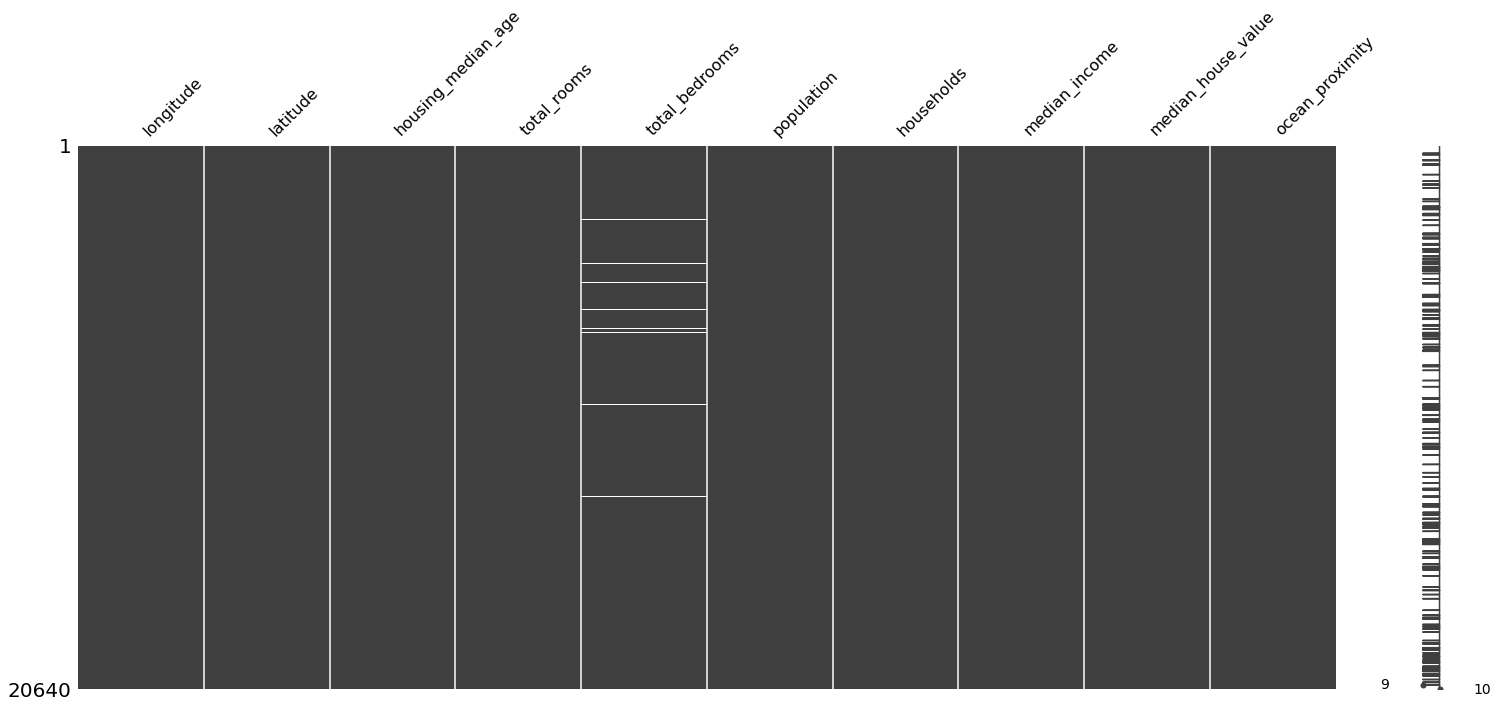

In [7]:
# showing the position of NAN Values
missingno.matrix(df_housing)

##  Exploratory Data Analysis

### `Univariate Visualization`

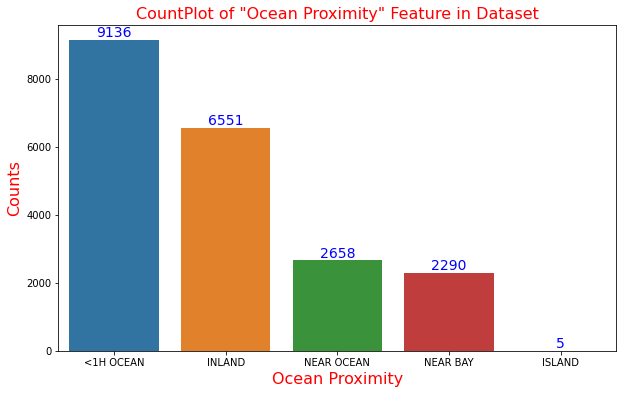

In [8]:
### Check the Distribution of (ocean_proximity) Feature in Dataset
ocean_values = df_housing['ocean_proximity'].value_counts()

## Plotting
plt.figure(figsize=(10, 6))
sns.countplot(x='ocean_proximity', data=df_housing, order=ocean_values.index)
plt.title('CountPlot of "Ocean Proximity" Feature in Dataset', fontsize=16, c='r')
plt.xlabel('Ocean Proximity', fontsize=16, c='r')
plt.ylabel('Counts', fontsize=16, c='r')
## To show the percentage of each bar
for i in range(len(ocean_values)):  ## loop over the numbers of categories (number of bars)
    each_count = ocean_values.values[i]
    #each_text = f'{((100*each_count)/ len(df_housing)):.2f}%'
    each_text = each_count
    plt.text(x=i, y=each_count+100, s=each_text, c='b', fontsize=14, ha='center')

In [9]:
## Replace the  (<1H OCEAN) to (1H OCEAN) -- will cause ane errors in Deploymnet
df_housing['ocean_proximity'] = df_housing['ocean_proximity'].replace('<1H OCEAN', '1H OCEAN')

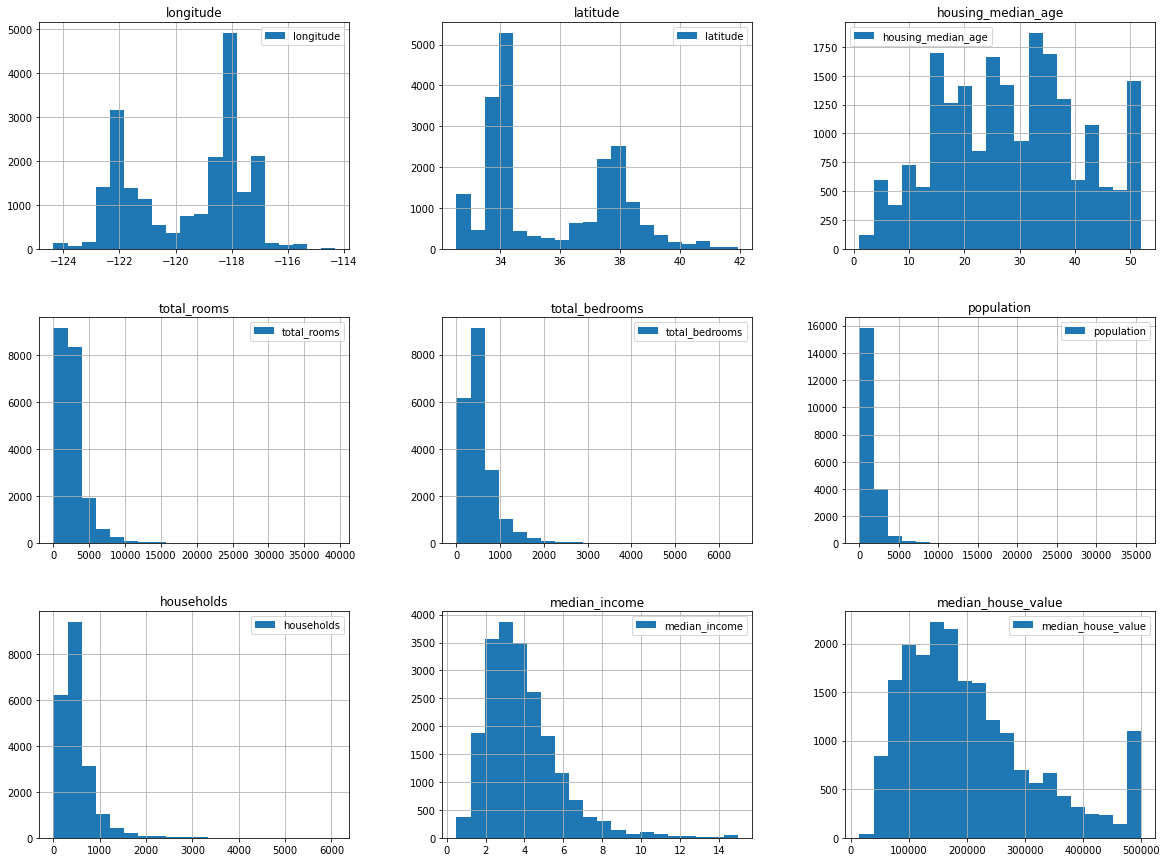

In [10]:
## Histogram Distrpution of Numerical Features in Dataset  we should convert it to "Normal Distr."
df_housing.hist(bins=20, figsize=(20, 15),legend=True,grid=True)
plt.show()

In [12]:
X_Numeric_Features=df_housing.drop(['median_house_value','ocean_proximity'],axis=1)
X_Categorical_Features=df_housing['ocean_proximity']

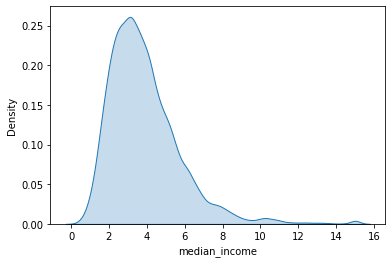

In [11]:
sns.kdeplot(df_housing.median_income,fill=True);

In [13]:
X_Numeric_Features.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')

In [14]:
#function to return plots for the feature
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

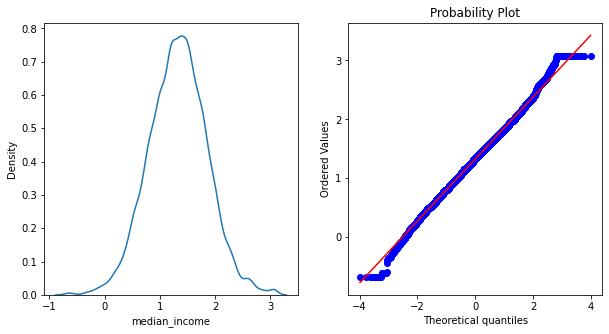

In [20]:
df_housing['median_income'],parameters=stats.boxcox(df_housing['median_income'])
normality(df_housing,'median_income')

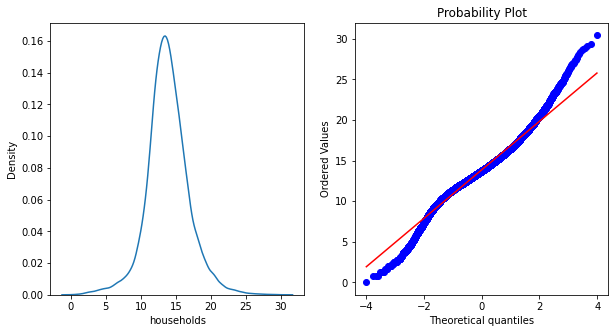

In [21]:
df_housing['households'],parameters=stats.boxcox(df_housing['households'])
normality(df_housing,'households')

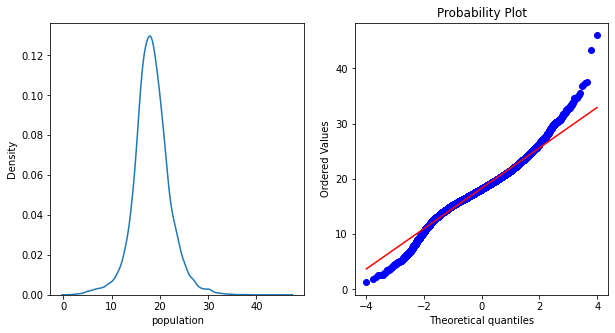

In [22]:
df_housing['population'],parameters=stats.boxcox(df_housing['population'])
normality(df_housing,'population')

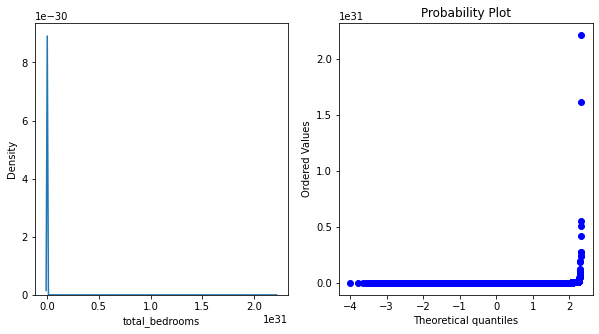

In [23]:
df_housing['total_bedrooms'],parameters=stats.boxcox(df_housing['total_bedrooms'])
normality(df_housing,'total_bedrooms')

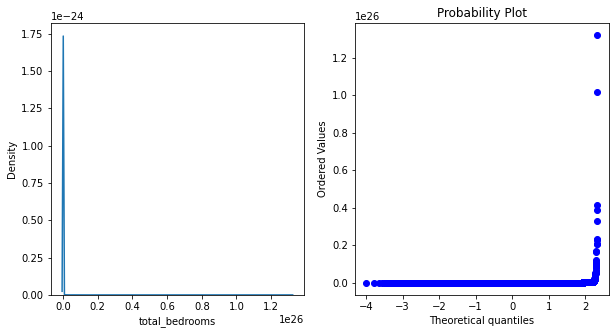

In [26]:
df_housing['total_bedrooms']=df_housing.total_bedrooms**(1/1.2)
normality(df_housing,'total_bedrooms')

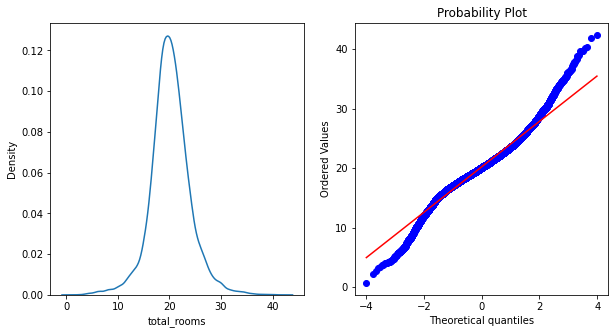

In [27]:
df_housing['total_rooms'],parameters=stats.boxcox(df_housing['total_rooms'])
normality(df_housing,'total_rooms')

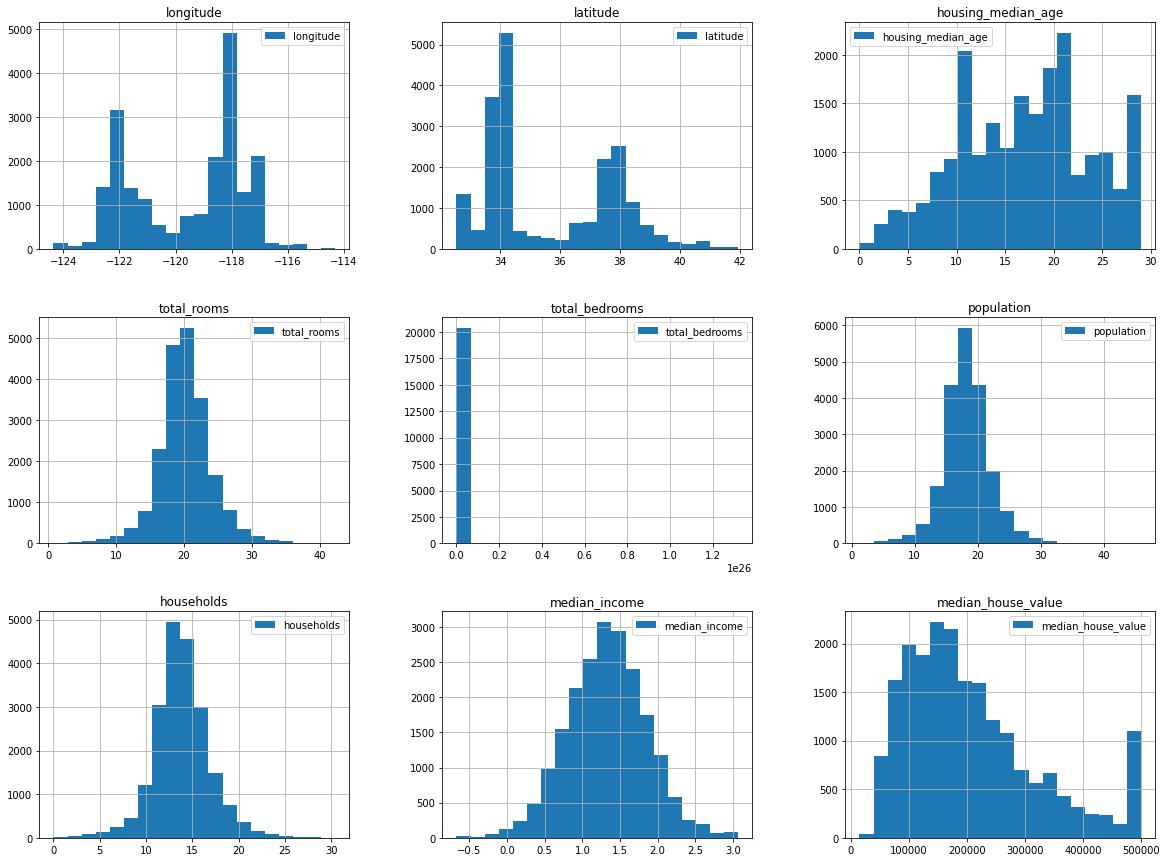

In [29]:
## Histogram Distrpution of Numerical Features in Dataset  we should convert it to "Normal Distr." Doneeeeeeeeee
df_housing.hist(bins=20, figsize=(20, 15),legend=True,grid=True)
plt.show()

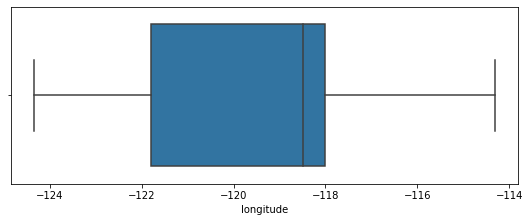

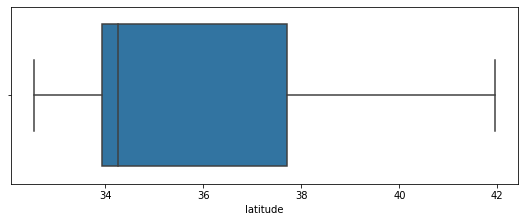

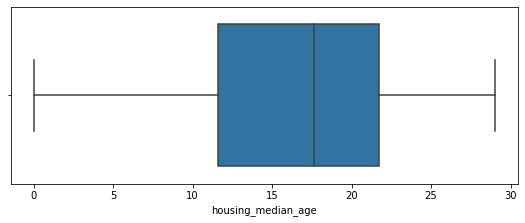

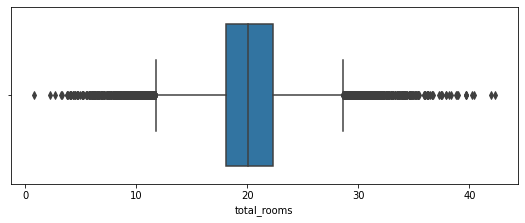

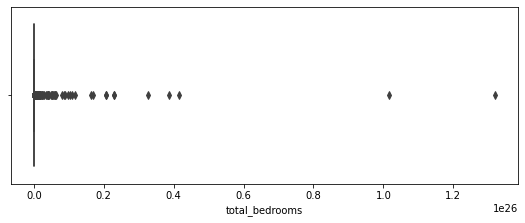

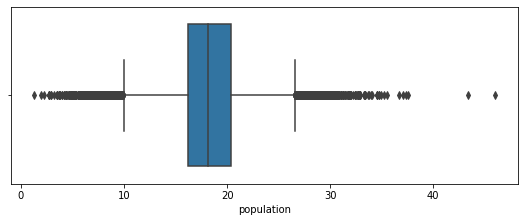

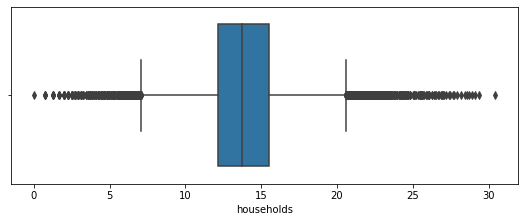

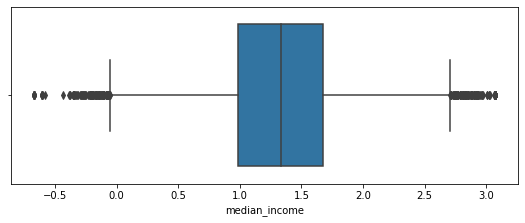

In [90]:
# check for outliers  ------------  but i can't handel it ):
counter=1
for i in X_Numeric_Features:
    plt.figure(figsize=(20, 15))
    plt.subplot(4,2,counter)
    sns.boxplot( data=df_housing, x=f'{i}')
    counter+=1

### `Check the Correlation between the Features and Target`

In [125]:
## show total colleration
df_housing.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.105252,0.033967,0.001791,0.114546,0.058161,-0.015288,-0.045967
latitude,-0.924664,1.000000,0.008489,-0.034096,-0.002081,-0.137726,-0.087530,-0.085441,-0.144160
housing_median_age,-0.105252,0.008489,1.000000,-0.352447,-0.043079,-0.276986,-0.277598,-0.141669,0.101593
total_rooms,0.033967,-0.034096,-0.352447,1.000000,0.119540,0.859972,0.928205,0.267438,0.165510
total_bedrooms,0.001791,-0.002081,-0.043079,0.119540,1.000000,0.120798,0.118920,0.006978,0.000956
population,0.114546,-0.137726,-0.276986,0.859972,0.120798,1.000000,0.926183,0.035052,-0.025156
households,0.058161,-0.087530,-0.277598,0.928205,0.118920,0.926183,1.000000,0.053170,0.076267
median_income,-0.015288,-0.085441,-0.141669,0.267438,0.006978,0.035052,0.053170,1.000000,0.659298
median_house_value,-0.045967,-0.144160,0.101593,0.165510,0.000956,-0.025156,0.076267,0.659298,1.000000


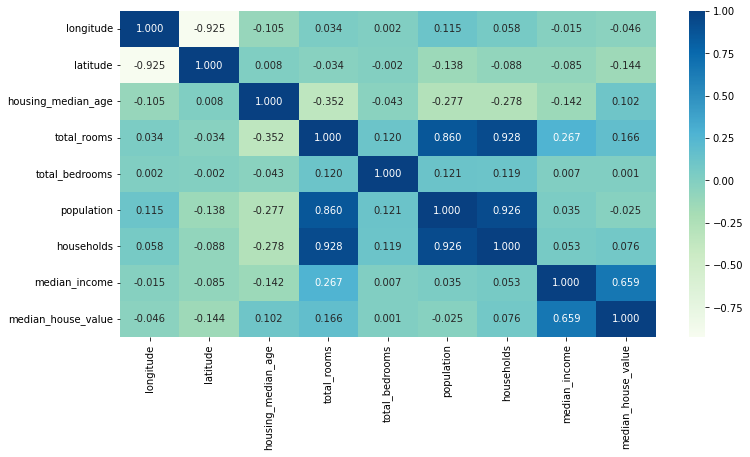

In [135]:
## show the correlation olny with the target
plt.figure(figsize=(12, 6))
sns.heatmap(df_housing.corr(), annot=True, cmap='GnBu', fmt='.3f')  ## symmetric matrix
plt.show()

### `Split the Dataset`

In [136]:
## Split the whole Dataset to Feature & Target
X = df_housing.drop(columns=['median_house_value'], axis=1)   ## Features
y = df_housing['median_house_value']   ## target

In [138]:
## Random split the dataset to two sets (train_set, test_set)
## For validation ---  I will use Cross Validation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=True,
                                                    random_state=101,stratify=df_housing['ocean_proximity'])


## Check Shapes of these Sets
print('X_train shape -- ', X_train.shape)
print('y_train shape -- ', y_train.shape)
print('X_test shape -- ', X_test.shape)
print('y_test shape -- ', y_test.shape)

X_train shape --  (17544, 9)
y_train shape --  (17544,)
X_test shape --  (3096, 9)
y_test shape --  (3096,)


### `Dealing with nulls`


In [142]:
## Separete the columns according to type (numerical or categorical)
num_cols = [col for col in X_train.columns if X_train[col].dtype in ['float32', 'float64', 'int32', 'int64']]
categ_cols = [col for col in X_train.columns if X_train[col].dtype not in ['float32', 'float64', 'int32', 'int64']]


print('Numerical Columns : \n', num_cols)
print('\n**')
print('Categorical Columns : \n', categ_cols)

Numerical Columns : 
 ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']

**
Categorical Columns : 
 ['ocean_proximity']


## fill the nan-value and standarized the data

In [145]:
## We can get much much easier like the following
## numerical pipeline
num_pipeline = Pipeline([
                        ('selector', DataFrameSelector(num_cols)),    ## select only these columns
                        ('imputer', SimpleImputer(strategy='median')),
                        ('scaler', StandardScaler())
                        ])

## categorical pipeline
categ_pipeline = Pipeline(steps=[
            ('selector', DataFrameSelector(categ_cols)),    ## select only these columns
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('OHE', OneHotEncoder(sparse=False))])

## concatenate both two pipelines
total_pipeline = FeatureUnion(transformer_list=[
                                            ('num_pipe', num_pipeline),
                                            ('categ_pipe', categ_pipeline)
                                               ]
                             )
## deal with (total_pipeline) as an instance -- fit and transform to train dataset and transform only to other datasets
X_train_final = total_pipeline.fit_transform(X_train)
X_test_final = total_pipeline.transform(X_test)                 ### Every thing is processed :D

# `Building ML Models`


### `1. LinearRegression`

In [146]:
## LinearRegression -- Regression using Ordinary Least Squares (OLS) Method

## define the model
lin_reg = LinearRegression()
lin_reg.fit(X_train_final, y_train)  ## train

LinearRegression()

In [147]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_lin = cross_val_score(estimator=lin_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_lin = -1 * rmse_scores_lin   ## we want it positive
rmse_scores_lin = np.sqrt(rmse_scores_lin)
print(f'RMSE Scores Using LinearRegression --- {np.round(rmse_scores_lin, 4)}')
print(f'Mean of RMSE Scores Using LinearRegression --- {rmse_scores_lin.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_lin = cross_val_predict(estimator=lin_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_lin = np.sqrt(mean_squared_error(y_train, y_pred_lin))
print(f'RMSE after prediction Using LinearRegression --- {rmse_pred_lin:.4f}')  ## almost the same result :D

RMSE Scores Using LinearRegression --- [68875.1365 70089.2579 72498.3148 72032.3629 72705.7804]
Mean of RMSE Scores Using LinearRegression --- 71240.1705
************************************************************************************************************************
RMSE after prediction Using LinearRegression --- 71255.9141


### `2. Ridge`
`Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L2-Norm)`

In [148]:
## Define Ridge Model (Regularized Version of LinearRegression)
ridge_reg = Ridge(alpha=0.9, solver='cholesky')
ridge_reg.fit(X_train_final, y_train)  ## train the model

Ridge(alpha=0.9, solver='cholesky')

In [149]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_ridge = cross_val_score(estimator=ridge_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_ridge = -1 * rmse_scores_ridge   ## we want it positive
rmse_scores_ridge = np.sqrt(rmse_scores_ridge)
print(f'RMSE Scores Using Ridge --- {np.round(rmse_scores_ridge, 4)}')
print(f'Mean of RMSE Scores Using Ridge --- {rmse_scores_ridge.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_ridge = cross_val_predict(estimator=ridge_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_ridge = np.sqrt(mean_squared_error(y_train, y_pred_ridge))
print(f'RMSE after prediction Using Ridge --- {rmse_pred_ridge:.4f}')  ## almost the same result :D

RMSE Scores Using Ridge --- [68884.8041 70089.9164 72496.9568 72026.3792 72710.8329]
Mean of RMSE Scores Using Ridge --- 71241.7779
************************************************************************************************************************
RMSE after prediction Using Ridge --- 71257.4575


### `3. Lasso`

`Regression using Ordinary Least Squares, but regularized version of LinearRegression using (L1-Norm)`

In [150]:
## Define Lasso Model (Regularized Version of LinearRegression)
lasso_reg = Lasso(alpha=1, max_iter=100000)
lasso_reg.fit(X_train_final, y_train)  ## train the model   and try predictions in the same way

Lasso(alpha=1, max_iter=100000)

In [151]:
## check the weights using Lasso
lasso_reg.coef_

array([-5.61034591e+04, -5.90564161e+04,  1.25471755e+04,  7.88721102e+03,
        1.14078887e+02, -6.66044796e+04,  5.94958200e+04,  6.42499346e+04,
        9.60439648e+01, -4.03882517e+04,  1.20595202e+05, -5.83342880e+03,
        0.00000000e+00])

### `4. PolynomialRegreassion`

In [152]:
## We can try use PolynomialRegression
poly_feat = PolynomialFeatures(degree=2, include_bias=False)   ## try random degrees, MUST be tuned
X_train_poly = poly_feat.fit_transform(X_train_final)

In [153]:
## Pass the above new poly Features to the Model -- bias is included in Model itself -- don't add it twice
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_train_poly, y_train)

LinearRegression()

In [154]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_poly = cross_val_score(estimator=lin_reg_poly, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_poly = -1 * rmse_scores_poly   ## we want it positive
rmse_scores_poly = np.sqrt(rmse_scores_poly)
print(f'RMSE Scores Using PolynomialRegression --- {np.round(rmse_scores_poly, 4)}')
print(f'Mean of RMSE Scores Using PolynomialRegression --- {rmse_scores_poly.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_poly = cross_val_predict(estimator=lin_reg_poly, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_poly = np.sqrt(mean_squared_error(y_train, y_pred_poly))
print(f'RMSE after prediction Using PolynomialRegression --- {rmse_pred_poly:.4f}')  ## almost the same result :D

RMSE Scores Using PolynomialRegression --- [68875.1365 70089.2579 72498.3148 72032.3629 72705.7804]
Mean of RMSE Scores Using PolynomialRegression --- 71240.1705
************************************************************************************************************************
RMSE after prediction Using PolynomialRegression --- 71255.9141


### `5. KNN`

In [160]:
## Using KNN, Low n_neighbors -> Overfitting &  High n_neighbors ->  Underfitting
knn_reg = KNeighborsRegressor(n_neighbors=8, p=2,  metric='minkowski', weights='uniform')
knn_reg.fit(X_train_final, y_train)  ## train the model

KNeighborsRegressor(n_neighbors=8)

In [161]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_knn = cross_val_score(estimator=knn_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_knn = -1 * rmse_scores_knn   ## we want it positive
rmse_scores_knn = np.sqrt(rmse_scores_knn)
print(f'RMSE Scores Using KNN --- {np.round(rmse_scores_knn, 4)}')
print(f'Mean of RMSE Scores Using KNN --- {rmse_scores_knn.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_knn = cross_val_predict(estimator=knn_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_knn = np.sqrt(mean_squared_error(y_train, y_pred_knn))
print(f'RMSE after prediction Using KNN --- {rmse_pred_knn:.4f}')  ## almost the same result :D

RMSE Scores Using KNN --- [58376.5068 60289.383  59941.1201 61721.2073 60578.0279]
Mean of RMSE Scores Using KNN --- 60181.2490
************************************************************************************************************************
RMSE after prediction Using KNN --- 60190.9556


### `6. RandomForest`

In [162]:
## Using RF ---> A lot of Hyperparams but the Dominant (n_estimators, max_depth)
forest_reg = RandomForestRegressor(n_estimators=150, max_depth=6, max_samples=0.8, random_state=42, n_jobs=-1)
forest_reg.fit(X_train_final, y_train)  ## train

RandomForestRegressor(max_depth=6, max_samples=0.8, n_estimators=150, n_jobs=-1,
                      random_state=42)

In [163]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_forest = cross_val_score(estimator=forest_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_forest = -1 * rmse_scores_forest   ## we want it positive
rmse_scores_forest = np.sqrt(rmse_scores_forest)
print(f'RMSE Scores Using RandomForest --- {np.round(rmse_scores_forest, 4)}')
print(f'Mean of RMSE Scores Using RandomForest --- {rmse_scores_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_forest = cross_val_predict(estimator=forest_reg, X=X_train_final, y=y_train, cv=5, method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_forest = np.sqrt(mean_squared_error(y_train, y_pred_forest))
print(f'RMSE after prediction Using RandomForest --- {rmse_pred_forest:.4f}')  ## almost the same result :D

RMSE Scores Using RandomForest --- [61780.2589 63194.532  64577.8307 65878.3478 64129.4763]
Mean of RMSE Scores Using RandomForest --- 63912.0891
************************************************************************************************************************
RMSE after prediction Using RandomForest --- 63926.8090


### `RF Tuning

In [165]:
## Using RandomizedSearchCV
params_best_forest = {'n_estimators': np.arange(100, 500, 50), 
                      'max_depth': np.arange(4, 20, 2), 
                      'max_samples': [0.7, 0.8, 0.9, 1]}

## Intialize
search_random_forest = RandomizedSearchCV(estimator=forest_reg, param_distributions=params_best_forest, 
                                          n_iter=20, scoring='neg_mean_squared_error', 
                                          cv=5, verbose=6, random_state=422)
search_random_forest.fit(X_train_final, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2219731162.106 total time=   2.2s
[CV 2/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2403329164.692 total time=   2.1s
[CV 3/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2576720800.521 total time=   2.5s
[CV 4/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2575730671.752 total time=   2.2s
[CV 5/5] END max_depth=18, max_samples=0.7, n_estimators=150;, score=-2499227288.392 total time=   2.2s
[CV 1/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2351793710.489 total time=   3.2s
[CV 2/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2613736227.541 total time=   3.2s
[CV 3/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2741210118.838 total time=   3.4s
[CV 4/5] END max_depth=12, max_samples=0.9, n_estimators=250;, score=-2770839490.557 total time=   3.3s
[C

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=6, max_samples=0.8,
                                                   n_estimators=150, n_jobs=-1,
                                                   random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': array([ 4,  6,  8, 10, 12, 14, 16, 18]),
                                        'max_samples': [0.7, 0.8, 0.9, 1],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=422, scoring='neg_mean_squared_error',
                   verbose=6)

In [166]:
## Get the best Params
best_foresr_params = search_random_forest.best_params_
print('best_foresr_params -- ', best_foresr_params)

## Get the best estimator
best_forest = search_random_forest.best_estimator_  ## predict using this Model
print('best_forest -- ', best_forest)

best_foresr_params --  {'n_estimators': 400, 'max_samples': 0.9, 'max_depth': 18}
best_forest --  RandomForestRegressor(max_depth=18, max_samples=0.9, n_estimators=400,
                      n_jobs=-1, random_state=42)


In [167]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_forest = cross_val_score(estimator=best_forest, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_forest = -1 * rmse_scores_tuned_forest   ## we want it positive
rmse_scores_tuned_forest = np.sqrt(rmse_scores_tuned_forest)
print(f'RMSE Scores Using Tuned RandomForest --- {np.round(rmse_scores_tuned_forest, 4)}')
print(f'Mean of RMSE Scores Using Tuned RandomForest --- {rmse_scores_tuned_forest.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_forest = cross_val_predict(estimator=best_forest, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_forest = np.sqrt(mean_squared_error(y_train, y_pred_tuned_forest))
print(f'RMSE after prediction Using Tuned RandomForest --- {rmse_pred_tuned_forest:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned RandomForest --- [46690.3262 48795.138  50405.3578 50466.9845 50093.9252]
Mean of RMSE Scores Using Tuned RandomForest --- 49290.3463
************************************************************************************************************************
RMSE after prediction Using Tuned RandomForest --- 49311.1505


### `7. XGboost`

In [168]:
## Using the Hero API -- XGBOOST
xgb_reg = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, subsample=0.8)
xgb_reg.fit(X_train_final, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [169]:
## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_xgb = cross_val_score(estimator=xgb_reg, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_xgb = -1 * rmse_scores_xgb   ## we want it positive
rmse_scores_xgb = np.sqrt(rmse_scores_xgb)
print(f'RMSE Scores Using Tuned XGBoost --- {np.round(rmse_scores_xgb, 4)}')
print(f'Mean of RMSE Scores Using XGBoost --- {rmse_scores_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_xgb = cross_val_predict(estimator=xgb_reg, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_xgb = np.sqrt(mean_squared_error(y_train, y_pred_xgb))
print(f'RMSE after prediction Using XGBoost --- {rmse_pred_xgb:.4f}')  ## almost the same result :D

RMSE Scores Using Tuned XGBoost --- [47564.3748 47759.2961 49166.6235 49873.2456 49491.2982]
Mean of RMSE Scores Using XGBoost --- 48770.9677
************************************************************************************************************************
RMSE after prediction Using XGBoost --- 48779.8858


### `Tuning XGBoost`

In [ ]:
### Let's try tuning XGBoost using GridSearchCV  --- needs alot of tuning
params_best_xgb = {'n_estimators': np.arange(100, 400, 50), 'max_depth': np.arange(4, 20, 2), 
                   'learning_rate': [0.1, 0.01,0.001], 'subsample': [0.7,0.8, 0.9]}


## Intitalize the GridSearchCV and Fit ti Data
grid_xgb = GridSearchCV(estimator=xgb_reg, param_grid=params_best_xgb, cv=5, 
                        scoring='neg_mean_squared_error', n_jobs=-1, verbose=6)
grid_xgb.fit(X_train_final, y_train)  ## train

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


In [ ]:
## Get the best Params
best_xgb_params = grid_xgb.best_params_
print('best_xgb_params -- ', best_xgb_params)

## Get the best estimator
best_xgb = grid_xgb.best_estimator_  ## predict using this Model
print('best_xgb -- ', best_xgb)

In [ ]:
### Finally

## Check scores of this Model (RMSE) using (cross_val_score)
rmse_scores_tuned_xgb = cross_val_score(estimator=best_xgb, X=X_train_final, y=y_train, 
                               cv=5, scoring='neg_mean_squared_error', n_jobs=-1)  ## sklearn deals with error as negative
rmse_scores_tuned_xgb = -1 * rmse_scores_tuned_xgb   ## we want it positive
rmse_scores_tuned_xgb = np.sqrt(rmse_scores_tuned_xgb)
print(f'RMSE Scores Using Tuned Tuned XGBoost --- {np.round(rmse_scores_tuned_xgb, 4)}')
print(f'Mean of RMSE Scores Using Tuned XGBoost --- {rmse_scores_tuned_xgb.mean():.4f}')

print('****'*30)

## Get Prediction using (cross_val_predict)
y_pred_tuned_xgb = cross_val_predict(estimator=best_xgb, X=X_train_final, y=y_train, cv=5, 
                                        method='predict', n_jobs=-1)
## You can check the (RMSE) using what model predicts and compare it with the Mean of above result -- almost the same
## take care of this point --> don't use .predict when you are using (crossValidation)
rmse_pred_tuned_xgb = np.sqrt(mean_squared_error(y_train, y_pred_tuned_xgb))
print(f'RMSE after prediction Using Tuned XGBoost --- {rmse_pred_tuned_xgb:.4f}')  ## almost the same result :D

In [ ]:
### `Download the best Model --- best_xgb`

In [ ]:
## Download using joblib
joblib.dump(best_xgb, 'model_XGBoost.pkl')

In [ ]:
## to load this pretrained Model
loaded_model = joblib.load('model_XGBoost.pkl')
loaded_model

### `Inference on Test Dataset`

In [ ]:
## Now, we can touch Test Dataset using (loaded_model == best_xgb) -- tuned XGBoost Model
y_pred_test = loaded_model.predict(X_test_final)  ## Remember X_test_final --> is processed and ready (take care)

## RMSE on test after finishing all my work
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f'RMSE on test Dataset using XGBoost -- {rmse_test:.3f}')   ## Very Good :D